In [1]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from scipy.constants import m_e,hbar
from ipywidgets import interactive
from scipy.special import hermite
from textwrap import wrap

In [2]:
def hermite_poly(n=9): 
    x = np.linspace(-n, n, 400) 
    p_monic1 = hermite(n, monic = True)
    p_monic2 = hermite(n)
    
    y1 = p_monic1(x)
    y2 = p_monic2(x)
    plt.figure(figsize=(7,2))
    plt.plot(x, y1, label = 'monic true')
    plt.plot(x,y2, label = 'monic false')
    plt.legend()
    plt.title(f"Monic Hermite polynomial of degree {n}")
    plt.xlabel("x")
    plt.grid()
    plt.ylabel(f"H_{n}(x)")
    plt.ylim(-300,300)
    plt.xlim(-n,n)
    plt.show()

In [3]:
interactive(hermite_poly, n = (1,13,1))

interactive(children=(IntSlider(value=9, description='n', max=13, min=1), Output()), _dom_classes=('widget-int…

In [4]:
def Potential_energy_of_LHO(omega=1,n=2):
    
    x = np.linspace(-5,5,100)
    plt.figure(figsize=(6,4))
    y = sp.Symbol('y')
    

    def Classical_PE(x):
        PE = (1/2)*((m_e*1e+27) * omega**2 * x**2) #1e+27 is just a scaling factor
        return PE
    
    def Intersection_point(nu):
        classical_PE = (1/2)*((m_e*1e+27) * omega**2 * y**2)
        Expr = (nu+0.5) * hbar * omega * 1e+31
        equation = sp.Eq(classical_PE,Expr)
        intersection_point = sp.solve([equation],y)
        #print(f"intersection points are {round(intersection_points[0][0],2)} and {round(intersection_points[1][0],2)}")
        Quantum_xvals = np.linspace(float(round(intersection_point[0][0],2)),float(round(intersection_point[1][0],2)),50)
        return Quantum_xvals
    
    def Quantum_PE(nu):
        Expr = (nu+0.5) * hbar * omega * 1e+31
        Expr_values = [Expr for i in range(len(Intersection_point(y)))]
        return Expr_values
    
    def Intersection_points(n):
        classical_PE = (1/2)*((m_e*1e+27) * omega**2 * y**2)
        equation = sp.Eq(classical_PE, (n+0.5) * hbar * omega * 1e+31)
        intersection_points = sp.solve([equation],y)
        #print(f"intersection points are {round(intersection_points[0][0],2)} and {round(intersection_points[1][0],2)}")
        Interactive_Quantum_xvals = np.linspace(float(round(intersection_points[0][0],2)),float(round(intersection_points[1][0],2)),50)
        return Interactive_Quantum_xvals
    
    def Interactive_Quantum_PE(n): #n is same as nu
        Expr = (n+0.5) * hbar * omega * 1e+31 #1e+34 is just a scaling factor
        Expr_values = [Expr for i in range(len(Intersection_points(y)))]
        return Expr_values
    
    
    
    plt.plot(Intersection_point(1),Quantum_PE(1))
    plt.plot(Intersection_point(2),Quantum_PE(2))
    plt.plot(Intersection_point(3),Quantum_PE(3))
    plt.plot(Intersection_point(4),Quantum_PE(4))
    
    plt.plot(x,Classical_PE(x),label=f'Classical')
    plt.plot(Intersection_points(n),Interactive_Quantum_PE(n),label=f' Quantum')
    plt.title("\n".join(wrap("Potential Energy Curve for a Linear Harmonic Oscillator",60)))
    plt.ylabel("Energy ---->")
    plt.xlabel("x_values (or displacement) ---->")
    plt.ylim(-0.0005,0.0085)
    plt.xlim(min(x),max(x))
    plt.legend()
    plt.grid()

    plt.show

In [5]:
interactive(Potential_energy_of_LHO, omega = (0.5,9.5,0.5), n=(1,7,1))

interactive(children=(FloatSlider(value=1.0, description='omega', max=9.5, min=0.5, step=0.5), IntSlider(value…

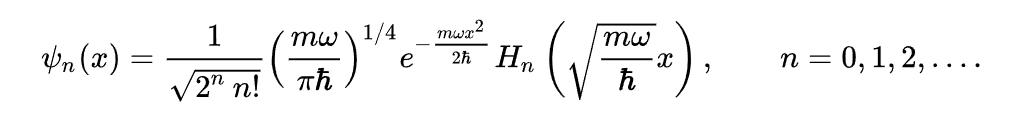

In [6]:
def wavefunction(omega,x,n):
    coefficient = 1/(np.sqrt(2**n * np.math.factorial(n) * np.sqrt((m_e * omega)/(np.pi * hbar))))
    Exponential = np.exp(-(m_e * omega * x**2)/(2 * hbar))
    Hermite = hermite(n)(x*np.sqrt((m_e * omega)/(hbar)))
    return coefficient * Exponential * Hermite
def classical_prob_density(A,x):
    expr = 1/(np.pi) * 1/(np.sqrt(A**2 - x**2))
    return expr

In [7]:
def wavefunction_plot(omega = 1.0, n = 30):
    
    fig, axs = plt.subplots(1,2,sharex = True, clear = True, figsize=(12,3))
    
    x = np.linspace(-0.1,0.1,5000)
    wavefunction_values = wavefunction(omega,x,n)
    prob_density = abs(wavefunction_values)**2
    
    axs[0].plot(x,wavefunction_values)
    axs[0].set_title("\n".join(wrap(f"Harmonic Oscillator Wavefunction for n = {n}, omega = {omega}", 37)))
    axs[0].grid()
    axs[0].axhline(0, c='g')
    axs[0].axvline(0,c='g')
    axs[0].set_xlabel("x_values ---->")
    axs[0].set_ylabel("Wavefunction ---->")
    
    
    axs[1].set_ylabel("Wavefunction ---->")
    axs[1].plot(x,prob_density, c = 'r')
    axs[1].plot(x,classical_prob_density(0.1,x)*1e-4, ls='--') #1e-4 is just a scaling factor
    #axs[1].set_ylim(-0.005,0.015)
    axs[1].set_xlabel("x_values ---->")
    axs[1].grid()
    axs[1].axhline(0, c='g')
    axs[1].axvline(0,c='g')
    axs[1].set_title("\n".join(wrap(f"Harmonic Oscillator Probability Density for n = {n}, omega = {omega}", 37)))
    
    
    plt.show()

In [8]:
interactive(wavefunction_plot, omega = (1,15), n = (0,30))

interactive(children=(IntSlider(value=1, description='omega', max=15, min=1), IntSlider(value=30, description=…

Attempt to merge pe and wavefucntion

In [9]:
def PE_and_WF(omega=1):
    
    x = np.linspace(-0.1,0.1,10000)
    plt.figure(figsize=(6,4))
    y = sp.Symbol('y')
    

    def Classical_PE(x):
        PE = (1/2)*((m_e) *1e27 * omega**2 * x**2) * 800**2 #1e+27 is just a scaling factor
        return PE
    
    def Quantum_PE(nu):
        Expr = (nu+0.5) * hbar * omega *1e33
        Expr_values = [Expr for i in range(len(x))]
        return Expr_values
    
    def wavefunction(x,n):
        coefficient = 1/(np.sqrt(2**n * np.math.factorial(n) * np.sqrt((m_e * omega)/(np.pi * hbar)))) * 0.4
        Exponential = np.exp(-(m_e * omega * x**2)/(2 * hbar))
        Hermite = hermite(n)(x*np.sqrt((m_e * omega)/(hbar)))
        return coefficient * Exponential * Hermite
    
    
    
    
    plt.plot(x,Quantum_PE(0))
    plt.plot(x,Quantum_PE(1))
    plt.plot(x,Quantum_PE(2))
    plt.plot(x,Quantum_PE(3))
    plt.plot(x,Quantum_PE(4))
    
    plt.plot(x,Quantum_PE(0)+wavefunction(x,0))
    plt.plot(x,Quantum_PE(1)+wavefunction(x,1))
    plt.plot(x,Quantum_PE(2)+wavefunction(x,2))
    plt.plot(x,Quantum_PE(3)+wavefunction(x,3))
    plt.plot(x,Quantum_PE(4)+wavefunction(x,4))
    
    
    plt.plot(x,Classical_PE(x),label=f'Classical')
    
    plt.title("\n".join(wrap("Potential Energy Curve for a Linear Harmonic Oscillator",60)))
    plt.ylabel("Energy ---->")
    plt.ylim(-0.025,0.6)
    plt.xlabel("x_values (or displacement) ---->")
    plt.xlim(-0.05,0.05)
    plt.xticks([])
    plt.yticks([])
    
    
    plt.arrow(0,-0.01,0,0.58,width=1e-9, head_width=3*1e-3, head_length=3*1e-2)
    plt.arrow(0,-0.01,-0.045,0,width=1e-9, head_width=3*1e-2, head_length=3*1e-3)
    plt.arrow(0,-0.01,0.045,0,width=1e-9, head_width=3*1e-2, head_length=3*1e-3)
    
    plt.fill_between(x,Quantum_PE(0)+wavefunction(x,0),Quantum_PE(0))
    plt.fill_between(x,Quantum_PE(1)+wavefunction(x,1),Quantum_PE(1))
    plt.fill_between(x,Quantum_PE(2)+wavefunction(x,2),Quantum_PE(2))
    plt.fill_between(x,Quantum_PE(3)+wavefunction(x,3),Quantum_PE(3))
    plt.fill_between(x,Quantum_PE(4)+wavefunction(x,4),Quantum_PE(4))
    
    plt.text(0,Quantum_PE(0)[0],'$E_{1}$',size='x-small',family='fantasy',weight='bold',style='italic')
    plt.text(0,Quantum_PE(1)[0],'$E_{2}$',size='x-small',family='fantasy',weight='bold',style='italic')
    plt.text(0,Quantum_PE(2)[0],'$E_{3}$',size='x-small',family='fantasy',weight='bold',style='italic')
    plt.text(0,Quantum_PE(3)[0],'$E_{4}$',size='x-small',family='fantasy',weight='bold',style='italic')
    plt.text(0,Quantum_PE(4)[0],'$E_{5}$',size='x-small',family='fantasy',weight='bold',style='italic')
    
    plt.show

C:\Users\Welcome\AppData\Local\Temp\ipykernel_12808\1808162741.py:18: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coefficient = 1/(np.sqrt(2**n * np.math.factorial(n) * np.sqrt((m_e * omega)/(np.pi * hbar)))) * 0.4


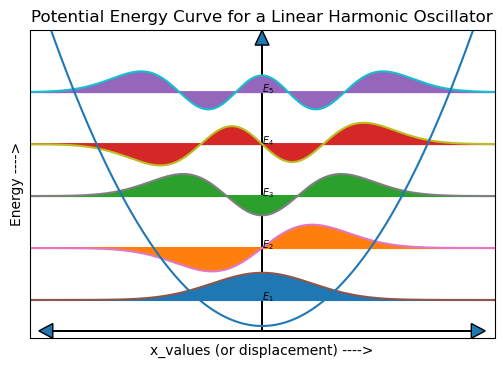

In [10]:
PE_and_WF(omega=1)

In [11]:
def PE_and_1D(omega=1, L =1):
    
    x = np.linspace(-2,2,500)
    plt.figure(figsize=(6,4))

    def Classical_PE(x):
        PE = (1/2)*((m_e*1e+27) * omega * x**2) * 1e+4 #1e+27 is just a scaling factor
        return PE
    
    def wavefunction(L,n,x):  
        WF = ((2/L)**(1/2))*np.sin((n*np.pi*x)/L)
        return WF
  
    
    plt.plot(x,Classical_PE(x),label=f'Classical')
    plt.plot(x,3 + wavefunction(L,1,x))
    plt.plot(x,6 + wavefunction(L,2,x))
    plt.plot(x,9 + wavefunction(L,3,x))
    plt.plot(x,12 + wavefunction(L,4,x))
    plt.plot(x,15 + wavefunction(L,5,x))
    #plt.plot(Intersection_points(y),Interactive_Quantum_PE(n),label=f' Quantum')
    plt.title("\n".join(wrap("Potential Energy Curve for a Linear Harmonic Oscillator",60)))
    plt.ylabel("Energy ---->")
    plt.xlabel("x_values (or displacement) ---->")
    plt.axvline(x=0,c='r')
    #plt.axhline(y=0,c='r')
    #plt.xticks([])
    #plt.yticks([])
    plt.ylim(-2.5, max(Classical_PE(x)))
    plt.xlim(min(x),max(x))
    #plt.legend()
    plt.grid()

    plt.show

In [12]:
interactive(PE_and_1D, omega = (0.5,9.5,0.5), L = (1,3,0.5) )

interactive(children=(FloatSlider(value=1.0, description='omega', max=9.5, min=0.5, step=0.5), FloatSlider(val…